<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Discover-the-strength-of-monotonic-relation" data-toc-modified-id="Discover-the-strength-of-monotonic-relation-1">Discover the strength of monotonic relation</a></span><ul class="toc-item"><li><span><a href="#Finding-Spearman’s-rank-correlation-coefficient-using-Jupyter-Notebook" data-toc-modified-id="Finding-Spearman’s-rank-correlation-coefficient-using-Jupyter-Notebook-1.1">Finding Spearman’s rank correlation coefficient using Jupyter Notebook</a></span></li></ul></li><li><span><a href="#Spearman's-Rank-Correlation-using-distinct-ranks" data-toc-modified-id="Spearman's-Rank-Correlation-using-distinct-ranks-2">Spearman's Rank Correlation using distinct ranks</a></span></li><li><span><a href="#Pearson-correlation-coefficent" data-toc-modified-id="Pearson-correlation-coefficent-3">Pearson correlation coefficent</a></span><ul class="toc-item"><li><span><a href="#Plotting-data" data-toc-modified-id="Plotting-data-3.1">Plotting data</a></span></li><li><span><a href="#Finding-manually" data-toc-modified-id="Finding-manually-3.2">Finding manually</a></span></li></ul></li><li><span><a href="#Spearman's-Rank-Correlation-with--identical-values" data-toc-modified-id="Spearman's-Rank-Correlation-with--identical-values-4">Spearman's Rank Correlation with  identical values</a></span></li><li><span><a href="#Finding-correlation-coefficient-manually" data-toc-modified-id="Finding-correlation-coefficient-manually-5">Finding correlation coefficient manually</a></span></li><li><span><a href="#Strictly-increasing" data-toc-modified-id="Strictly-increasing-6">Strictly increasing</a></span></li><li><span><a href="#Strictly-decreasing" data-toc-modified-id="Strictly-decreasing-7">Strictly decreasing</a></span></li><li><span><a href="#No-monotonic-behavior" data-toc-modified-id="No-monotonic-behavior-8">No monotonic behavior</a></span></li><li><span><a href="#Importing-a-CSV-file" data-toc-modified-id="Importing-a-CSV-file-9">Importing a CSV file</a></span></li><li><span><a href="#Plotting-imported-data" data-toc-modified-id="Plotting-imported-data-10">Plotting imported data</a></span></li><li><span><a href="#Ranking-data" data-toc-modified-id="Ranking-data-11">Ranking data</a></span></li><li><span><a href="#Examples-to-use-Spearman's-correlation-are:" data-toc-modified-id="Examples-to-use-Spearman's-correlation-are:-12">Examples to use Spearman's correlation are:</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-13">Reference</a></span></li></ul></div>

# Discover the strength of monotonic relation

## Finding Spearman’s rank correlation coefficient using Jupyter Notebook

Spearman's rank correlation coefficient, $r_s$ shows the correlation between two ordinal data how one ordinal data increases or decreases as the other ordinal increases which are described as "monotonic". 

In this article, I explore different methods to find Spearman's rank correlation coeficient using data with distinct ranks.

Spearman's rank correlation uses ordinal data. Examples of ordinal data are:

- 1st, 2nd, 3rd, 
- Small, Medium, Large, XL,
- Strongly agree, Agree, Neutral, Disagree, Strongly Disagree
- Very often, Often, Not Often, Not at all

We import necessary libraries.

In [1]:
# https://gist.github.com/shinokada/574f639d4f07ed1388abd8f24f6936a4

In [2]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Spearman's Rank Correlation using distinct ranks

When all ranks are distinct integers, the Spearman correlation coefficient can be computed by the following formula.

$$r_s=1-\frac{6\sum d^2}{n(n^2-1)} \tag{1-1}$$

This formla is an alternative to Pearson's correlation if the the data are ordinal and monotonic and if there are no ties in data.

A value of 1 means the set of data is strictly increasing and the value of -1 means it is strictly decreasing. A value of 0 means that data shows no monotonic behavior. the Spearman correlation between two variables will be high when an observation has a similar rank between the two variables.


# Pearson correlation coefficent

The Spearman correlation coefficient is defined as the Pearson correlation coefficient using the rank variables.
Pearson correlation coefficient for two sets of population data, x and y, is:

$$
\begin{align}
\rho_{r_x,r_y}= \frac{cov(r_x,r_y)}{\sigma _{rx} \sigma _{ry}} \tag{1-2}
\end{align}
$$

where cov is the covariance of ranked data $r_x$ and $r_y$. $\sigma_{rx}$ and $\sigma_{ry}$ are the population standard deviations of x and y.

Let's find out how the correlation of the rank at 5km run relate to the rank of 10km run. All ranks are distinct intergers and no same numbers. There are different way to find the coefficient.

- [`scipy.stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) calculates a Spearman correlation coefficient with associated p-value.
- [Pandas corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr) 
- Using formula (1-1)
- Using formala (1-2)

In [5]:
# https://gist.github.com/shinokada/83b2d7cd47e4fc1993d50400570e1b36

In [18]:
race = pd.DataFrame(
    [
        [3,3],
        [4,2],
        [2,1],
        [1,5],
        [6,7],
        [7,4],
        [5,6]
    ],
    columns=["After 5km","End of race"])
race

,After 5km,End of race
0,3,3
1,4,2
2,2,1
3,1,5
4,6,7
5,7,4
6,5,6


## Plotting data

Let's plot this data.

In [19]:
# https://gist.github.com/shinokada/e491ca766909d2627f254bc55f6b1bf9

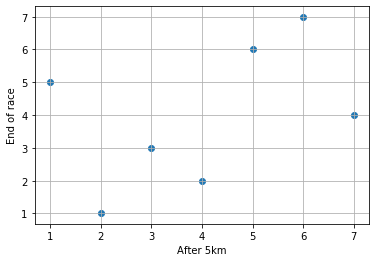

In [34]:
fig, ax = plt.subplots()
ax.scatter(race.iloc[:,0],race.iloc[:,1])
ax.set_xlabel('After 5km')
ax.set_ylabel('End of race')
ax.grid(True)
plt.show()

## Finding manually


Rank Set A|Rank Set B|d|$d^2$
:-:|:-:|:-:|:-:
3|3|0|0
4|2|2|4
2|1|1|1
1|5|4|16
6|7|1|1
7|4|3|9
5|6|1|1

$$
\sum d^2=0+4+1+16+1+9+1=32 \\
\text{Since all ranks are distinct intergers we use the equation (1-2)} \\
r_s=1-\frac{6\sum d^2}{n(n^2-1)} \\
r_s=1-\frac{6\cdot 32}{7(7^2-1)} \\
r_s=0.4285714285714286
$$


In [41]:
1-(6*(0+4+1+16+1+9+1)/(7*(7**2-1)))

0.4285714285714286

We find $r_s$ and p-value using `scipy.stats.spearmanr`.

In [42]:
# https://gist.github.com/shinokada/cc6039ce789f594a134b644ce9afebcd 

In [43]:
correlation, pval = spearmanr(race)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.428571, p-value=0.337368


p-value is the level of significance. It determines the probability that the correlation happened by chance.


In [44]:
# https://gist.github.com/shinokada/62fc538f01252f765bdf789a0efa80d6

In [45]:
fivekm = [3,4,2,1,6,7,5]
tenkm=[3,2,1,5,7,4,6]
correlation, pval = spearmanr(fivekm, tenkm)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
if pval < 0.05:
    print('At 5% level of significance, the final rankings is significant or dependent')
else:
    print('At 5% level of significance, the final rankings is not significant or independent')

correlation=0.428571, p-value=0.337368
At 5% level of significance, the final rankings is not significant or independent


# Spearman's Rank Correlation with  identical values

Now we create another dataframe which includes the same values.

In [46]:
# https://gist.github.com/shinokada/2a67199e68bc08535d6eb278fde199ac

correlation=0.807692, p-value=0.028001


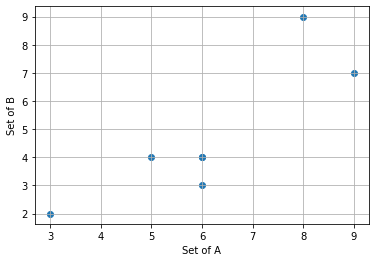

In [49]:
fig, ax = plt.subplots()

df = pd.DataFrame(
    [
        [7,3],
        [6,4],
        [5,4],
        [3,2],
        [6,4],
        [8,9],
        [9,7]
    ],
    columns=['Set of A','Set of B'])

correlation, pval = spearmanr(df)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
ax.scatter(df.iloc[:,0],df.iloc[:,1])
ax.set_xlabel('Set of A')
ax.set_ylabel('Set of B')
ax.grid(True)
plt.show()

Let's find the Spearman correlation coefficient using `scipy.stats.spearmanr`.

In [33]:
correlation, pval = spearmanr(df)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.893260, p-value=0.016482


# Finding correlation coefficient manually


After 5km|End of race|d|$d^2$
:-:|:-:|:-:|:-:
3.5|3|0.5|0.25
2|3|1|1
1|1|1|1
3.5|3|0.5|0.25
5|6|1|1
6|5|1|1




In [24]:
1-(6*(0+4+1+16+1+9+1)/(7*(7**2-1)))

0.4285714285714286

Manually rank the above data to the ordinal data. Finding the $r_s$ and p-value. This shows the exactly the same result as finding them from the raw data.

For Set of A:

3|5|6|6|8|11
:-:|:-:|:-:|:-:|:-:|:-:
1|2|3.5|3.5|5|6

When more than one piece of data have the same value the rank given to each is the average of the ranks. 6 and 6 in the above data are 3rd and 4th. Hence each is given a rank of:

$$\frac{3+4}{2}=3.5$$

For Set of B:

4|4|2|4|9|7
:-:|:-:|:-:|:-:|:-:|:-:
3|3|1|3|6|5

9 is the greatest number. There are three fours which are 3rd, 4th and 5th. 

$$\frac{2+3+4}{3}=3$$ 

So each 4 will be given a rank of 3.

Rank Set A|Rank Set B|d|$d^2$
:-:|:-:|:-:|:-:
6|4|2|4
5|4|1|1
3.5|6|2.5|6.25
3.5|4|0.5|0.25
2|1|1|1
1|2|1|1

Rank Set A|Rank Set B|d|$d^2$
:-:|:-:|:-:|:-:
1|3|2|4
2|3|1|1
3.5|1|2.5|6.25
3.5|3|0.5|0.25
5|6|1|1
6|5|1|1

$$
\sum d^2=4+1+6.25+0.25+1+1=13.5 \\
\text{From (1-1)} \\
r_s=1-\frac{6\sum d^2}{n(n^2-1)} \\
r_s=1-\frac{6\cdot 13.5}{6(6^2-1)} \\
r_s=0.61428571
$$

In [13]:
1-(6*(4+1+6.25+0.25+1+1)/(6*(6**2-1)))

0.6142857142857143

In [14]:
# https://gist.github.com/shinokada/768b2b6f1c2bce8790c6ccf68187e0e9

In [15]:
ordinaldata = pd.DataFrame(
    [
        [1.0,3],
        [2.0,3],
        [3.5,1],
        [3.5,3],
        [5.0,6],
        [6.0,5]
    ],
    columns=['Ranking of A','Ranking of B'])
print(ordinaldata)
correlation, pval = spearmanr(ordinaldata)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
sns.scatterplot(x='Ranking of A',y='Ranking of B',data=ordinaldata)
plt.show()

   Ranking of A  Ranking of B
0           1.0             3
1           2.0             3
2           3.5             1
3           3.5             3
4           5.0             6
5           6.0             5
correlation=0.585239, p-value=0.222365


NameError: name 'sns' is not defined

In [ ]:
ordinaldata = pd.DataFrame(
    [
        [56,66],
        [75,70],
        [45,40],
        [71,60],
        [62,65],
        [64,56],
        [58,59],
        [80,77],
        [76,67],
        [61,63]
    ],
    columns=['Ranking of A','Ranking of B'])

correlation, pval = spearmanr(ordinaldata)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

# Strictly increasing

A value of 1 means the set of data is strictly increasing. The rank do not change. p-value is 0 in this case.

In [ ]:
# https://gist.github.com/shinokada/318d5d1eb9a7981f003447ee19adaca6

In [ ]:
race2 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,5],
        [6,6],
        [7,7]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race2)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
sns.scatterplot(x='After 5km',y='End of race',data=race2)
plt.show()

# Strictly decreasing
The value of -1 means it is strictly decreasing. The rank is in a reversal order.

In [ ]:
# https://gist.github.com/shinokada/817f920c45bd3f983ca9bd6ed2dd1838

In [ ]:
race3 = pd.DataFrame(
    [
        [1,7],
        [2,6],
        [3,5],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race3)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
sns.scatterplot(x='After 5km',y='End of race',data=race3)
plt.show()

# No monotonic behavior
No monotonic behavior gives the value of 0.

In [ ]:
# https://gist.github.com/shinokada/3c5f78acda90a402288d75b8c795953b

In [ ]:
race4 = pd.DataFrame(
    [
        [1,1],
        [2,2],
        [3,3],
        [4,4],
        [5,3],
        [6,2],
        [7,1]
    ],
    columns=['After 5km','End of race'])
correlation, pval = spearmanr(race4)
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')
sns.scatterplot(x='After 5km',y='End of race',data=race4)
plt.show()

The

# Importing a CSV file

We will use data from BIXI Montréal is a public bicycle sharing system serving Montréal, Quebec, Canada. It is a big file so it takes time to process data.

In [ ]:
# https://gist.github.com/shinokada/38870816b84774930b56aea3ba4077b3

In [ ]:
rides = pd.read_csv('https://raw.githubusercontent.com/shinokada/python-for-ib-diploma-mathematics/master/Data/OD_2019-05.csv')
print(rides.shape)
print(rides.head())

There are more than seventy nine thousand of lines with six columns. Columns are start_data, start_station_code, end_date, end_station_code, duration_sec and is_member.

We group by end_station_code and sum the duration_sec. We assign n_rides with the number of end_station_code.

In [ ]:
# https://gist.github.com/shinokada/9a87dfffe5d552894884abb24cc0a4d8

In [ ]:
by_end_station = (
    rides
        .loc[:, ['end_station_code', 'duration_sec']]
        .groupby('end_station_code')
        .sum()
        .assign(n_rides=rides['end_station_code'].value_counts())
)
print(by_end_station.head())

# Plotting imported data

We use seaborn's [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to plot our imported data. We set labels of the x-axis and y-axis and call the data. 

In [ ]:
# https://gist.github.com/shinokada/674f1dd88b9570a1101f61a19b669509

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

sns.jointplot(x='n_rides', y='duration_sec', data=by_end_station)
plt.show()

# Ranking data

Please note that the majority of data are on the lower end. We can use `scipy.stats.rankdata` to see the data by ranking.

In [ ]:
# https://gist.github.com/shinokada/a00fb4482a6d9729e898fb496fc74989

In [ ]:
from scipy.stats import rankdata
sns.jointplot(x=rankdata(by_end_station['n_rides']), y=rankdata(by_end_station['duration_sec']))
plt.show()

Let's find the Spearman's $R_s$.

In [ ]:
# https://gist.github.com/shinokada/af1c1ff0d722a779c95766b8983e5f98

In [ ]:
correlation, pval = spearmanr(by_end_station)
print(f'correlation={correlation:.6f}')

The number of rides at a bike stop is almost totally predictive of the number of commuter seconds spend riding it.

# Examples to use Spearman's correlation are:

- [IQ of a person with the number of hours spent on games](https://www.wikiwand.com/en/Spearman%27s_rank_correlation_coefficient)

- [Free university meals and their CGPA scores](https://www.toppr.com/guides/business-mathematics-and-statistics/correlation-and-regression/rank-correlation/)

- [Physics and Math ranks](https://www.statisticshowto.datasciencecentral.com/spearman-rank-correlation-definition-calculate/)

# Reference

- To compare the Spearman correlation and the Pearson correlation, please read [A comparison of the Pearson and Spearman correlation here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) 

- https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php

- https://www.kaggle.com/residentmario/spearman-correlation-with-montreal-bikes/data

- https://seaborn.pydata.org/generated/seaborn.jointplot.html

- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/